In [4]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt  

In [12]:
#loading the dataset 
kick10k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick10k.csv', index_col = None)
kick15k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick15k.csv', index_col = None) 
kick20k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick20k.csv', index_col = None)
kick30k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick30k.csv', index_col = None) 

In [13]:
kick10k.head()

,main_category,state,backers,usd_pledged_real,usd_goal_real,diff_days,deadline_month,deadline_day,deadline_weekday,launched_month,launched_day,launched_weekday,country_recoded,main_category_recoded,recoded_target
0,Publishing,successful,18,3715.00,3704.00,38,11,28,4,10,21,1,22,12,1
1,Film & Video,failed,31,2562.00,100000.00,60,5,28,2,3,29,5,22,6,0
2,Games,failed,37,3592.00,30000.00,30,11,10,5,10,11,3,22,8,0
3,Technology,failed,33,1475.06,2741.74,60,7,31,4,6,1,0,8,13,0
4,Film & Video,successful,27,10495.00,10000.00,25,6,26,1,6,1,4,22,6,1


In [17]:
# Retrieve features/attributes of dataset
X = kick10k.iloc[:, 2:14]

# Retrieve target variable of dataset
y = kick10k.iloc[:,14]

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#normalizing the data 
sc = StandardScaler()
sc.fit(X) # Compute the mean and std to be used for later scaling 
X_train_std = sc.transform(X)

np.random.seed(42) # Ensure reproducability

inner_cv = KFold(n_splits=7, shuffle=True)
outer_cv = KFold(n_splits=7, shuffle=True)

### Building the KNN model 

In [102]:
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc2 = StandardScaler()
sc2.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std2 = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set Xby centering and scaling


knn = neighbors.KNeighborsClassifier(n_neighbors=5, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
knn = knn.fit(X_train, y_train)  

In [104]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std2)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

Accuracy (out-of-sample): 0.40
Accuracy (in-sample): 0.41
F1 score (out-of-sample):  0.28571428571428575
F1 score (in-sample)    :  0.29201010232078817


In [108]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold
cv = list(StratifiedKFold(n_splits=2, # Number of folds. Must be at least 2
                          ).split(X_train, y_train))
# Accuracy
scores=cross_val_score(knn, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# F-1 scores
scores_f1=cross_val_score(knn,X_test_std, y_test_, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))# returns an array of scores of the estimator for each run of the cross validation.
print(scores_f1)



Accuracy: 1.00 (+/- 0.00)
[0.996 0.996 0.999 0.997 0.993 0.999 0.993 0.996 0.994 0.998]
F1-score: 1.00 (+/- 0.00)
[0.99587214 0.99586912 0.99896613 0.9969007  0.9927736  0.99896613
 0.99277885 0.99586912 0.99379909 0.99793303]


In [109]:
from sklearn import neighbors

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}],
                  scoring='accuracy',
                  cv=inner_cv)
#print(len(y))
gs_knn = gs_knn.fit(X_train_std,y) 
print("\n Parameter Tuning KNN #1")
print("Non-nested CV Accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())
 
#test 2 --------------------------------------------------------------------------------------
# Choosing k for kNN AND type of distance
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn2 = gs_knn2.fit(X_train_std,y)  
print("\n Parameter Tuning KNN #2")
print("Non-nested CV Accuracy: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


 Parameter Tuning KNN #1
Non-nested CV Accuracy:  0.620999484468385
Optimal Parameter:  {'n_neighbors': 19}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')
Nested CV Accuracy:  0.9974999796979673  +/-  0.0012330585415691007

 Parameter Tuning KNN #2
Non-nested CV Accuracy:  0.620501384598626
Optimal Parameter:  {'n_neighbors': 19, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')
Nested CV Accuracy:  0.9971999296569573  +/-  0.0015431837301739153


In [63]:
from sklearn import neighbors

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}],
                  scoring='f1',
                  cv=inner_cv)
#print(len(y))
gs_knn = gs_knn.fit(X_train_std,y) 
print("\n Parameter Tuning #6")
print("Non-nested CV accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X, y=y, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())
 
#test 2 --------------------------------------------------------------------------------------
# Choosing k for kNN AND type of distance
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn2 = gs_knn2.fit(X_train_std,y)  
print("\n Parameter Tuning #7")
print("Non-nested CV acc.: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X, y=y, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


 Parameter Tuning #6
Non-nested CV accuracy:  0.49721060219633334
Optimal Parameter:  {'n_neighbors': 1}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Nested CV f1:  0.9966808428195499  +/-  0.002074222475690608

 Parameter Tuning #7
Non-nested CV acc.:  0.48696668120549597
Optimal Parameter:  {'n_neighbors': 1, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Nested CV f1:  0.9967124636884872  +/-  0.0017148210711226148


### Learning Curve Evaluation 

In [91]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#555557") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#7BC043") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#555557",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#7BC043",
             label="Cross-validation/Test score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

##### Displaying the Figure 

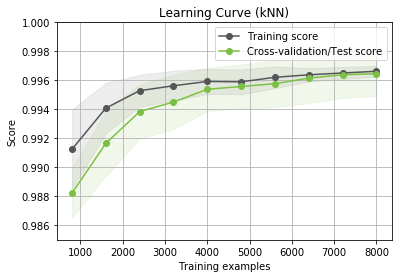

In [111]:
from sklearn.neighbors import KNeighborsClassifier
title = "Learning Curve (kNN)"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=13, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier()
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.985, 1.00), cv=cv, n_jobs=4)

plt.show() # Display the figure